# Investigating Rising Rates of Depression and Suicide in the United States

In [5]:
# import modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
pd.options.mode.chained_assignment = None # to suppress warnings about chained indexing
%matplotlib inline
pd.__version__

u'0.22.0'

Recently, the Centers for Disease Control and Prevention in the United States released a [report](https://www.cdc.gov/media/releases/2018/p0607-suicide-prevention.htm) indicating that the suicide rates since 1999 have increased by 30%. In addition to this staggering statistic, suicide is the 10th leading cause of death in the United States. Below is a list of the top ten leading causes of death in the United States (data from [CDC](https://www.cdc.gov/nchs/fastats/deaths.htm)):
1. Heart disease
2. Cancer
3. Chronic lower respiratory diseases
4. Accidents (unintentional injuries)
5. Stroke (cerebrovascular diseases)
6. Alzheimer’s disease
7. Diabetes
8. Influenza and Pneumonia
9. Nephritis, nephrotic syndrome and nephrosis (Kidney Disease)
10. Intentional self-harm (suicide)

Suicide is the only leading cause of death that is not a disease nor an accident, and thus is clearly a severe public health concern. Furthermore, suicide is the second leading cause of death among 10-34 year olds, the 4th among 35-54 year olds, and 8th among 55-64 year olds, see [NIMH](https://www.nimh.nih.gov/health/statistics/suicide.shtml).

Our fist goal of this project is to gain an overall understanding of the magnitude of suicides in the US through the World Health Organization's data on mortality, gain insight into the trends of suicide over the past 50 years in the US, and explore the underlying trends in suicide specifically around sex and age. 

The World Health Organization (WHO) collects mortality data into their online [database](http://www.who.int/healthinfo/mortality_data/en/) per country that reports it. They also have this data in raw, zipped format [here](http://www.who.int/healthinfo/statistics/mortality_rawdata/en/) that they update yearly. The data is spread across multiple files (Mortality ICD-7, Mortality ICD-8, Mortality ICD -9, Mortality ICD-10 parts 1 and 2). ICD-7 corresponds to data taken prior to 1968 and was not used in this analysis. ICD-8 comprises mainly 1968-1979 data, ICD-9 1980-1998, and ICD-10 1999-2015.

ICD stands for the international classification of diseases. These classifications are codes that correspond to a particular disease. For example, in ICD-9, the code 'B321' corresponds to the disease, Pneumonia, and in these files, it corresponds to death by Pneumonia. Over ICD-8, ICD-9, and ICD-10, the codes have changed, so in order to grab data for particular deaths by a disease, the codes had to be looked up. The most useful website for looking up previous ICD codes is [here](http://www.wolfbane.com/icd/). Additionally, the WHO has their own word document with corresponding codes for each file; however, they are not all correct and should be cross referenced with the above link to ensure the correct code. This document also includes nearly all descriptions about the datasets and is very useful for the data analysis. This file can be downloaded by clicking the link below.

http://www.who.int/healthinfo/statistics/documentation.zip



Below, the raw files are downloaded from the WHO's website.  

In [6]:
# WHO Data Part 2 (ICD - International Classification of Diseases)
! wget http://www.who.int/healthinfo/statistics/Morticd10_part2.zip
! unzip Morticd10_part2.zip
ICD10_1 = pd.read_csv('Morticd10_part2', dtype = object)

--2018-06-16 00:13:53--  http://www.who.int/healthinfo/statistics/Morticd10_part2.zip
Resolving www.who.int (www.who.int)... 13.33.147.6, 13.33.147.136, 13.33.147.125, ...
Connecting to www.who.int (www.who.int)|13.33.147.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24659569 (24M) [application/zip]
Saving to: ‘Morticd10_part2.zip’

Morticd10_part2.zip 100%[===================>]  23.52M  5.39MB/s    in 6.6s    

2018-06-16 00:14:15 (3.55 MB/s) - ‘Morticd10_part2.zip’ saved [24659569/24659569]

Archive:  Morticd10_part2.zip
  inflating: Morticd10_part2         


In [7]:
#WHO Data Part 1
! wget http://www.who.int/healthinfo/statistics/Morticd10_part1.zip
! unzip Morticd10_part1.zip
ICD10_2 = pd.read_csv('Morticd10_part1', dtype=object)

--2018-06-16 00:14:28--  http://www.who.int/healthinfo/statistics/Morticd10_part1.zip
Resolving www.who.int (www.who.int)... 13.33.147.6, 13.33.147.136, 13.33.147.125, ...
Connecting to www.who.int (www.who.int)|13.33.147.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15501665 (15M) [application/zip]
Saving to: ‘Morticd10_part1.zip’

Morticd10_part1.zip 100%[===================>]  14.78M  5.89MB/s    in 2.5s    

2018-06-16 00:14:40 (5.89 MB/s) - ‘Morticd10_part1.zip’ saved [15501665/15501665]

Archive:  Morticd10_part1.zip
  inflating: Morticd10_part1         


In [8]:
# WHO Data Part 3
! wget http://www.who.int/healthinfo/statistics/morticd9.zip
! unzip morticd9.zip
ICD9 = pd.read_csv('Morticd9', dtype = object)

--2018-06-16 00:14:49--  http://www.who.int/healthinfo/statistics/morticd9.zip
Resolving www.who.int (www.who.int)... 13.33.147.6, 13.33.147.136, 13.33.147.125, ...
Connecting to www.who.int (www.who.int)|13.33.147.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13511573 (13M) [application/zip]
Saving to: ‘morticd9.zip’

morticd9.zip        100%[===================>]  12.88M  4.25MB/s    in 3.0s    

2018-06-16 00:15:00 (4.25 MB/s) - ‘morticd9.zip’ saved [13511573/13511573]

Archive:  morticd9.zip
  inflating: Morticd9                


In [9]:
# WHO Data Part 4
! wget http://www.who.int/healthinfo/statistics/morticd08.zip
! unzip morticd08.zip
ICD8 = pd.read_csv('Morticd8', dtype = object)

--2018-06-16 00:15:07--  http://www.who.int/healthinfo/statistics/morticd08.zip
Resolving www.who.int (www.who.int)... 54.230.118.45, 54.230.118.195, 54.230.118.87, ...
Connecting to www.who.int (www.who.int)|54.230.118.45|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5447912 (5.2M) [application/zip]
Saving to: ‘morticd08.zip’

morticd08.zip       100%[===================>]   5.20M  3.49MB/s    in 1.5s    

2018-06-16 00:15:12 (3.49 MB/s) - ‘morticd08.zip’ saved [5447912/5447912]

Archive:  morticd08.zip
  inflating: Morticd8                


The ICD dataframes are large dataframes with many explanatory columns. The word document from the WHO explains each column. We are particularly interested in the 'Deaths' columns  and the 'Cause',  'Year',  and 'Country' columns

In [10]:
print(ICD10_1.shape, ICD10_2.shape, ICD8.shape, ICD9.shape)
print(ICD10_1.columns)

((2212436, 39), (1398903, 39), (380627, 39), (899470, 39))
Index([u'Country', u'Admin1', u'SubDiv', u'Year', u'List', u'Cause', u'Sex',
       u'Frmat', u'IM_Frmat', u'Deaths1', u'Deaths2', u'Deaths3', u'Deaths4',
       u'Deaths5', u'Deaths6', u'Deaths7', u'Deaths8', u'Deaths9', u'Deaths10',
       u'Deaths11', u'Deaths12', u'Deaths13', u'Deaths14', u'Deaths15',
       u'Deaths16', u'Deaths17', u'Deaths18', u'Deaths19', u'Deaths20',
       u'Deaths21', u'Deaths22', u'Deaths23', u'Deaths24', u'Deaths25',
       u'Deaths26', u'IM_Deaths1', u'IM_Deaths2', u'IM_Deaths3',
       u'IM_Deaths4'],
      dtype='object')


Below are the ICD codes that correspond to death by suicide, cardiovascular disease, pneumonia and influenza, and diabetes. Mortality data on cardiovascular disease, pneumonia and influenza, and diabetes were collected to compare their rates to that of suicide. 

In [0]:
## ICD Codes
# suicide codes
sui_codes_8 = ['A147'] # suicide code for ICD8
sui_codes_9 = ['B54', 'B054'] # suicide codes for ICD9
sui_codes_10 = ['1101','Y870'] + ['X'+str(i) for i in range(60,85)] + ['X' +str(i) for i in range(600,850)] # suicide codes for ICD10
# cardiovascular disease codes
heart_codes_8 = ['A083']
heart_codes_9 = ['B27']
heart_codes_10 = ['I' + str(i) for i in range(200,260)] +['1067','1066','1068']
# pneumonia/inlfluenza disease codes
pne_codes_8 = ['A091','A090','A092']
pne_codes_9 = ['B321','B322']
pne_codes_10 =  ['1073','1074']+['J' +str(i) for i in range(100,190)] + ['J' + str(i) for i in range(10,19)]
# Diabetes codes
diab_codes_8 = ['A064']
diab_codes_9 =['B181']
diab_codes_10 = ['E' +str(i) for i in range(100,150)] +['1052']

The ICD data files are concatenated into single dataframes for each disease. 

In [0]:
sui_df = pd.concat([ICD10_1[ICD10_1['Cause'].isin(sui_codes_10)], # create death by suicide dataframe, concatenate all data from ICD
                    ICD10_2[ICD10_2['Cause'].isin(sui_codes_10)], 
                    ICD9[ICD9['Cause'].isin(sui_codes_9)],
                    ICD8[ICD8['Cause'].isin(sui_codes_8)]], ignore_index=True)

diab_df = pd.concat([ICD10_1[ICD10_1['Cause'].isin(diab_codes_10)], # death by diabetes dataframe
                     ICD10_2[ICD10_2['Cause'].isin(diab_codes_10)], 
                     ICD9[ICD9['Cause'].isin(diab_codes_9)],ICD8[ICD8['Cause'].isin(diab_codes_8)]], ignore_index=True)

pne_df = pd.concat([ICD10_1[ICD10_1['Cause'].isin(pne_codes_10)], # death by pneumonia/influenza
                    ICD10_2[ICD10_2['Cause'].isin(pne_codes_10)], 
                    ICD9[ICD9['Cause'].isin(pne_codes_9)],
                    ICD8[ICD8['Cause'].isin(pne_codes_8)]], ignore_index=True)

heart_df = pd.concat([ICD10_1[ICD10_1['Cause'].isin(heart_codes_10)], # death by ischaemic heart disease
                      ICD10_2[ICD10_2['Cause'].isin(heart_codes_10)], 
                      ICD9[ICD9['Cause'].isin(heart_codes_9)],
                      ICD8[ICD8['Cause'].isin(heart_codes_8)]], ignore_index=True)

age_df = sui_df.copy() # copy for later


# clean up dataframes
sui_df.drop(sui_df.columns[10:], axis = 1, inplace = True)
sex_df = sui_df.copy() # copy for later
sui_df.drop(columns =['Admin1', 'SubDiv','List','Frmat','IM_Frmat', 'Sex'], inplace = True)
heart_df.drop(heart_df.columns[10:], axis = 1, inplace = True)
heart_df.drop(columns =['Admin1', 'SubDiv','List','Frmat','IM_Frmat', 'Sex'], inplace = True)
diab_df.drop(diab_df.columns[10:], axis = 1, inplace = True)
diab_df.drop(columns =['Admin1', 'SubDiv','List','Frmat','IM_Frmat', 'Sex'], inplace = True)
pne_df.drop(pne_df.columns[10:], axis = 1, inplace = True)
pne_df.drop(columns =['Admin1', 'SubDiv','List','Frmat','IM_Frmat', 'Sex'], inplace = True)

In [13]:
# change types to int for merge
sui_df[['Country', 'Year', 'Deaths1']] = sui_df[['Country', 'Year', 'Deaths1']].astype(int)
heart_df[['Country', 'Year', 'Deaths1']] = heart_df[['Country', 'Year', 'Deaths1']].astype(int)
diab_df[['Country', 'Year', 'Deaths1']] = diab_df[['Country', 'Year', 'Deaths1']].astype(int)
pne_df[['Country', 'Year', 'Deaths1']] = pne_df[['Country', 'Year', 'Deaths1']].astype(int)
sui_df.dtypes

Country     int64
Year        int64
Cause      object
Deaths1     int64
dtype: object

Next, population data by year per country was grabbed from the WHO website using the wget command. This is also listed with the ICD raw data files. This dataset gives yearly population data for each country per gender and age group. 

In [14]:
! wget http://www.who.int/healthinfo/Pop.zip
! unzip Pop.zip
pop = pd.read_csv('pop')
print(pop.shape,pop.columns)

--2018-06-16 00:15:20--  http://www.who.int/healthinfo/Pop.zip
Resolving www.who.int (www.who.int)... 54.230.118.45, 54.230.118.195, 54.230.118.87, ...
Connecting to www.who.int (www.who.int)|54.230.118.45|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 587604 (574K) [application/zip]
Saving to: ‘Pop.zip’

Pop.zip             100%[===================>] 573.83K   882KB/s    in 0.7s    

2018-06-16 00:15:22 (882 KB/s) - ‘Pop.zip’ saved [587604/587604]

Archive:  Pop.zip
  inflating: pop                     
((9349, 33), Index([u'Country', u'Admin1', u'SubDiv', u'Year', u'Sex', u'Frmat', u'Pop1',
       u'Pop2', u'Pop3', u'Pop4', u'Pop5', u'Pop6', u'Pop7', u'Pop8', u'Pop9',
       u'Pop10', u'Pop11', u'Pop12', u'Pop13', u'Pop14', u'Pop15', u'Pop16',
       u'Pop17', u'Pop18', u'Pop19', u'Pop20', u'Pop21', u'Pop22', u'Pop23',
       u'Pop24', u'Pop25', u'Pop26', u'Lb'],
      dtype='object'))


In [0]:
# save for later
pop_age = pop.copy()

# drop columns
pop.drop(pop.columns[7:], axis = 1, inplace = True)
pop_sex = pop.copy()
pop.drop(columns =['Admin1', 'SubDiv','Frmat', 'Sex'], inplace = True)
pop_sex.drop(columns =['Admin1', 'SubDiv','Frmat'], inplace = True)

In [16]:
# Change types to int
pop['Pop1'] = pop['Pop1'].astype(int)
pop.dtypes

Country    int64
Year       int64
Pop1       int64
dtype: object

Next, countries and the corresponding country codes were acquired from the WHO raw data site. The countries dataframe will simply be used to match country codes (listed under the 'Country' columns in the population and ICD dataframes) with actual country names. 

In [17]:
# Get country/country code data
! wget http://www.who.int/healthinfo/statistics/country_codes.zip
! unzip country_codes.zip
countries = pd.read_csv('country_codes')
countries.head()

--2018-06-16 00:15:27--  http://www.who.int/healthinfo/statistics/country_codes.zip
Resolving www.who.int (www.who.int)... 54.230.118.45, 54.230.118.195, 54.230.118.87, ...
Connecting to www.who.int (www.who.int)|54.230.118.45|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2152 (2.1K) [application/zip]
Saving to: ‘country_codes.zip’

country_codes.zip   100%[===================>]   2.10K  --.-KB/s    in 0s      

2018-06-16 00:15:27 (271 MB/s) - ‘country_codes.zip’ saved [2152/2152]

Archive:  country_codes.zip
  inflating: country_codes           


,country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso


In [0]:
# Merge population and country data and death data with country data
pop = pop.merge(countries, left_on='Country', right_on='country')
sui_df = sui_df.merge(countries, left_on='Country', right_on='country')
heart_df = heart_df.merge(countries, left_on='Country', right_on='country')
diab_df = diab_df.merge(countries, left_on='Country', right_on='country')
pne_df = pne_df.merge(countries, left_on='Country', right_on='country')

In [0]:
# Fix column names/drop extra merged columns
pop.drop(columns=['Country','country'], inplace= True)
pop.columns = ['Year', 'Population', 'Country']
sui_df.drop(columns=['Country','country','Cause'], inplace= True)
sui_df.columns = ['Year', 'Suicides', 'Country']
heart_df.drop(columns=['Country','country','Cause'], inplace= True)
heart_df.columns = ['Year', 'Ischaemic Heart Deaths', 'Country']
diab_df.drop(columns=['Country','country','Cause'], inplace= True)
diab_df.columns = ['Year', 'Diabetes Deaths', 'Country']
pne_df.drop(columns=['Country','country','Cause'], inplace= True)
pne_df.columns = ['Year', 'Pnemonia/Influenza Deaths', 'Country']

In [20]:
sui_df.head()

,Year,Suicides,Country
0,2005,4,Seychelles
1,2005,1,Seychelles
2,2006,8,Seychelles
3,2006,0,Seychelles
4,2007,5,Seychelles


In [21]:
pop.head()

,Year,Population,Country
0,1980,137100,Cape Verde
1,1980,159000,Cape Verde
2,1955,5051500,Egypt
3,1955,5049400,Egypt
4,1956,5353700,Egypt


Notice above that there are two values for 'Suicides' and 'Population' for each year. This corresponds to the sex, which will be analyzed later. Below, years are grouped and countries are grouped and the corresponding number of suicides and populations are summed. 

In [0]:
# Group pop, death data and sum
pop = pop.groupby(['Country','Year'], as_index = False).agg('sum')
sui_df = sui_df.groupby(['Country','Year'], as_index = False).agg('sum')
heart_df = heart_df.groupby(['Country','Year'], as_index = False).agg('sum')
diab_df = diab_df.groupby(['Country','Year'], as_index = False).agg('sum')
pne_df = pne_df.groupby(['Country','Year'], as_index = False).agg('sum')

In [0]:
# Merge population data with death data
sui_df = sui_df.merge(pop, on=['Country','Year'], how = 'left')
heart_df = heart_df.merge(pop, on=['Country','Year'], how = 'left')
diab_df = diab_df.merge(pop, on=['Country','Year'], how = 'left')
pne_df = pne_df.merge(pop, on=['Country','Year'], how = 'left')

Now, the data frames are in order. The dataframes have information on total deaths per country per year by the particular cause of death (suicide, cardiovascular disease, diabetes, pneumonia/influenza). The US data will now be grabbed from each of these dataframes to analyze the rates of death for each cause.

In [0]:
# Grab us death data
us_sui = sui_df[sui_df['Country'] == 'United States of America']
us_heart = heart_df[heart_df['Country'] == 'United States of America']
us_diab = diab_df[diab_df['Country'] == 'United States of America']
us_pne = pne_df[pne_df['Country'] == 'United States of America']

The US data is missing some values. 2008-2015 population data is missing from the dataset. These values are filled in below. Population data was found [here](http://www.multpl.com/united-states-population/table). 

In [0]:
# Add missing population data to US 2008-2015, 
us_pop =[304090000,306770000,309340000,311640000,313990000,316230000,318620000,321040000]
for i in range(4252,4260):
    us_sui.loc[i,'Population'] = us_pop[i-4252]
for i in range(4122,4130):
    us_heart.loc[i,'Population'] = us_pop[i-4122]
for i in range(4109,4117):
    us_diab.loc[i,'Population'] = us_pop[i-4109]
for i in range(4363,4371):
    us_pne.loc[i,'Population'] = us_pop[i-4363]

In [0]:
# Create death rate columns
us_sui['Suicide_Rate'] = us_sui.loc[:,'Suicides']/us_sui.loc[:,'Population']
us_heart['Heart_Deaths_Rate'] = us_heart.loc[:,'Ischaemic Heart Deaths']/us_heart.loc[:,'Population']
us_diab['Diabetes_Deaths_Rate'] = us_diab.loc[:,'Diabetes Deaths']/us_diab.loc[:,'Population']
us_pne['Inf/Pne_Deaths_Rate'] = us_pne.loc[:,'Pnemonia/Influenza Deaths']/us_pne.loc[:,'Population']

Below, the suicide rate is plotted from 1968-2015. One can clearly see the supposed 30% increase since 1999.

Text(0,0.5,u'Suicide Rate')

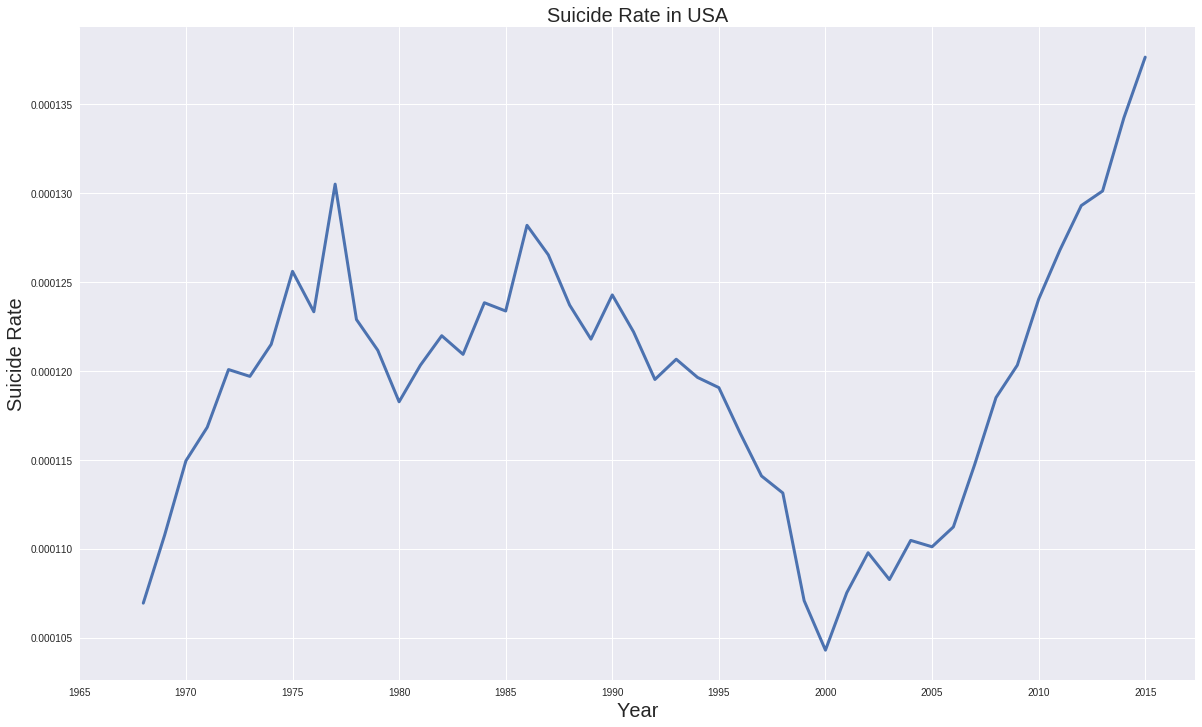

In [27]:
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=15) 
plt.figure(figsize = [20,12])
plt.plot(us_sui.Year,us_sui.Suicide_Rate, linewidth=3)
#plt.plot(us_heart.Year,us_heart.Heart_Deaths_Rate,linewidth=3)
#plt.plot(us_diab.Year,us_diab.Diabetes_Deaths_Rate,linewidth=3)
#plt.plot(us_pne.Year,us_pne['Inf/Pne_Deaths_Rate'],linewidth=3)
plt.title('Suicide Rate in USA', fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.xticks([1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])
plt.ylabel('Suicide Rate',fontsize = 20)

Next, the suicide data is plotted with the 7th (diabetes) and 8th (Pneumonia/Influenza) leading causes of death in the US. 

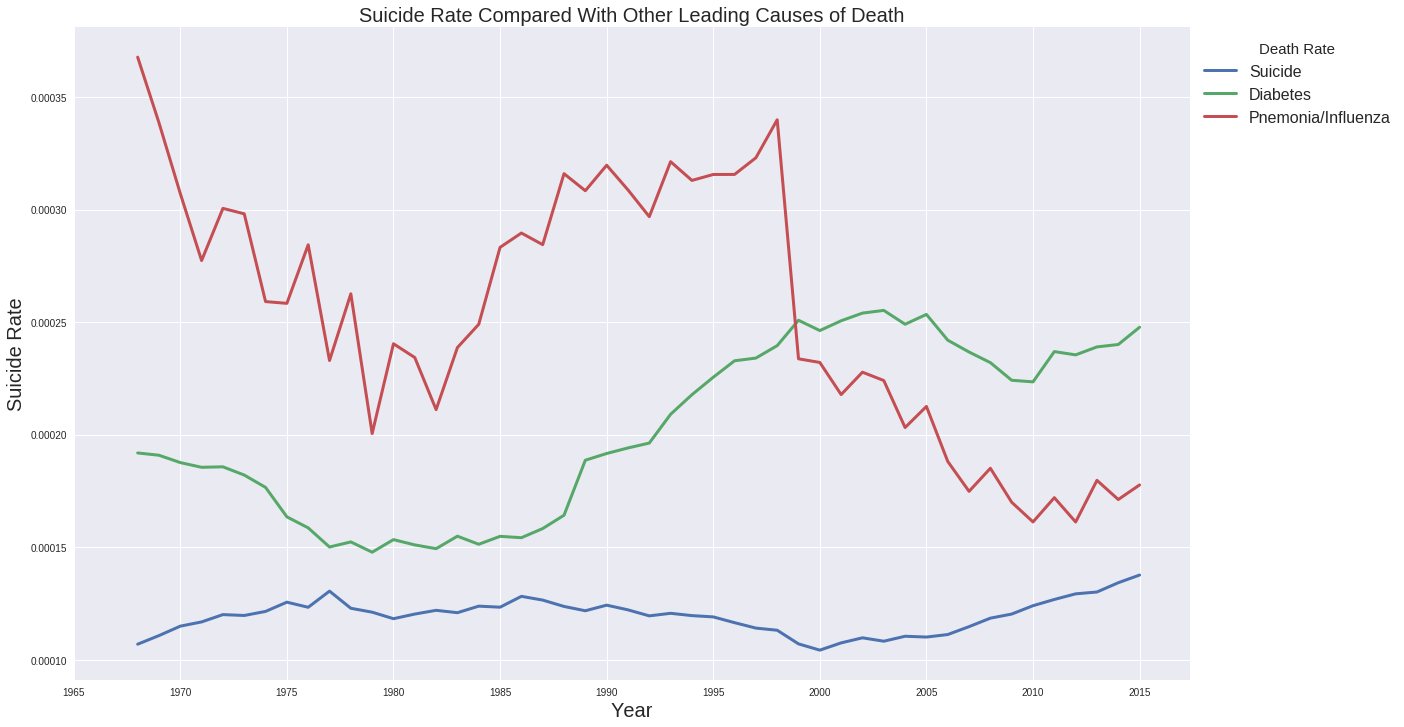

In [28]:
plt.figure(figsize = [20,12])
plt.plot(us_sui.Year,us_sui.Suicide_Rate, linewidth=3, label='Suicide')
#plt.plot(us_heart.Year,us_heart.Heart_Deaths_Rate,linewidth=3)
plt.plot(us_diab.Year,us_diab.Diabetes_Deaths_Rate,linewidth=3, label = 'Diabetes') # diabetes deaths
plt.plot(us_pne.Year,us_pne['Inf/Pne_Deaths_Rate'],linewidth=3, label = 'Pnemonia/Influenza') # pnemonia/influenza deaths
plt.title('Suicide Rate Compared With Other Leading Causes of Death', fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.xticks([1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])
plt.ylabel('Suicide Rate',fontsize = 20)
plt.legend(ncol = 1, loc = 2, bbox_to_anchor=(1,1),prop={'size': 16},fontsize = 20, title='Death Rate')

All of these death rates are compared with the leading cause of death in the US, cardiovascular disease.

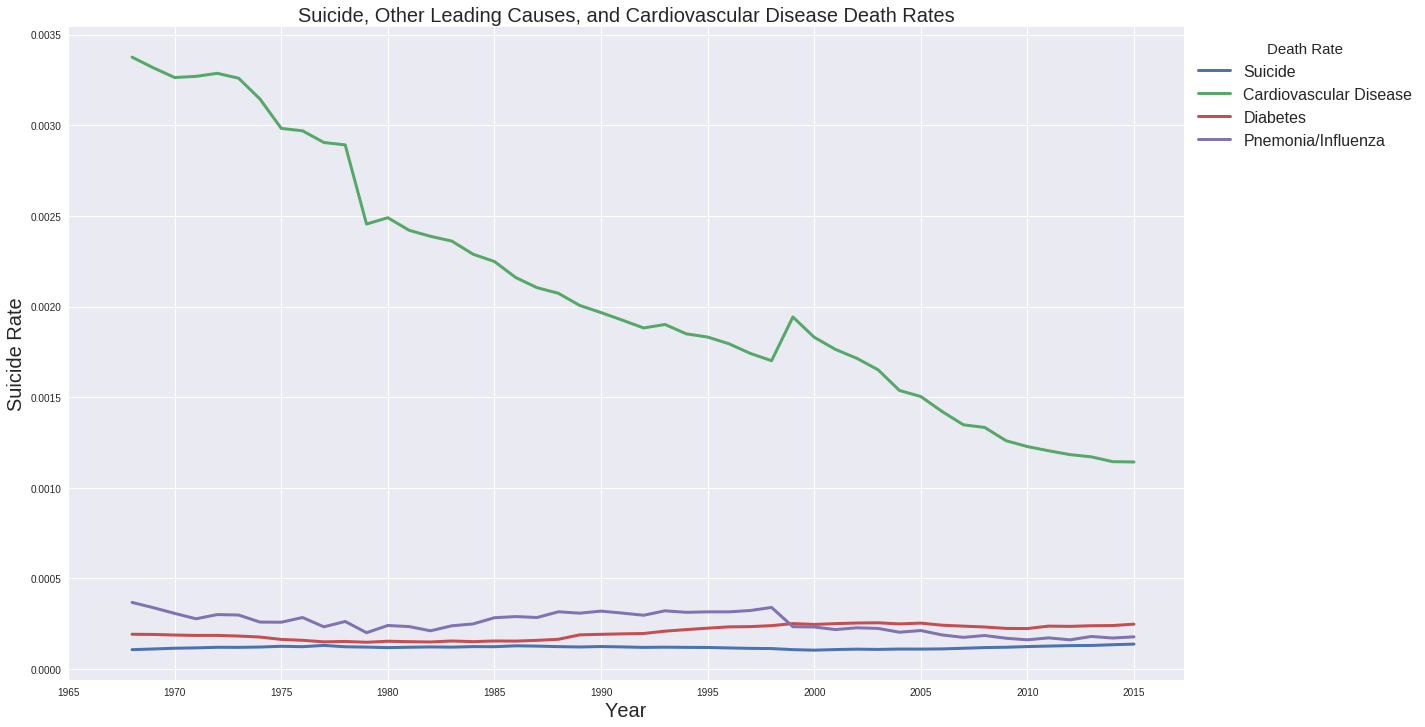

In [29]:
plt.figure(figsize = [20,12])
plt.plot(us_sui.Year,us_sui.Suicide_Rate, linewidth=3, label='Suicide')
plt.plot(us_heart.Year,us_heart.Heart_Deaths_Rate,linewidth=3, label = 'Cardiovascular Disease')
plt.plot(us_diab.Year,us_diab.Diabetes_Deaths_Rate,linewidth=3, label = 'Diabetes') # diabetes deaths
plt.plot(us_pne.Year,us_pne['Inf/Pne_Deaths_Rate'],linewidth=3, label = 'Pnemonia/Influenza') # pnemonia/influenza deaths
plt.title('Suicide, Other Leading Causes, and Cardiovascular Disease Death Rates', fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.xticks([1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])
plt.ylabel('Suicide Rate',fontsize = 20)
plt.legend(ncol = 1, loc = 2, bbox_to_anchor=(1,1),prop={'size': 16},fontsize = 20, title='Death Rate')

Due to the difficulty of interpreting a rate, the following plots depict the deaths in  number of deaths. 

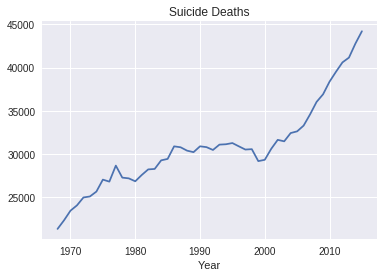

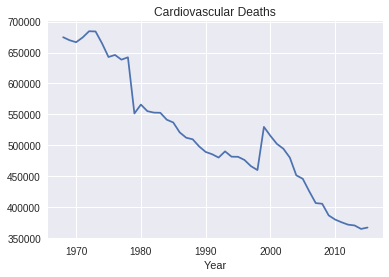

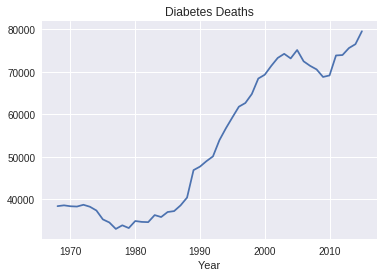

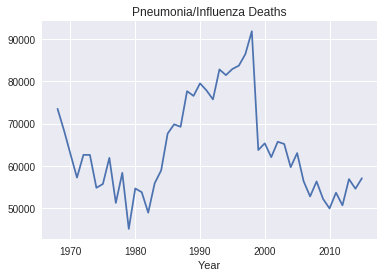

In [30]:
# in numbers
us_sui.plot.line(x = 'Year', y ='Suicides', title = 'Suicide Deaths', legend = False)
us_heart.plot.line(x='Year',y = 'Ischaemic Heart Deaths', title = 'Cardiovascular Deaths', legend = False)
us_diab.plot.line(x='Year',y='Diabetes Deaths', title = 'Diabetes Deaths', legend = False)
us_pne.plot.line(x='Year',y='Pnemonia/Influenza Deaths', title = 'Pneumonia/Influenza Deaths', legend = False)

# 2015 death data from Suicide, Diabetes, Pneumonia/Influenza and Cardiovascular disease
yr_15 = [44193, 79535, 57046, 366801]
yr_99 = [29199, 68399,63730,529659]
group = ['Suicide','Diabetes','Pneumonia/Influenza','Cardiovascular']
comp = pd.DataFrame([yr_15,yr_99], columns = group, index=[2015,1999])

Lastly, it was detailed in the CDC article that the suicide rate increased by 30% from 1999 to 2015. This is confirmed below.

Text(0,0.5,u'Total Deaths')

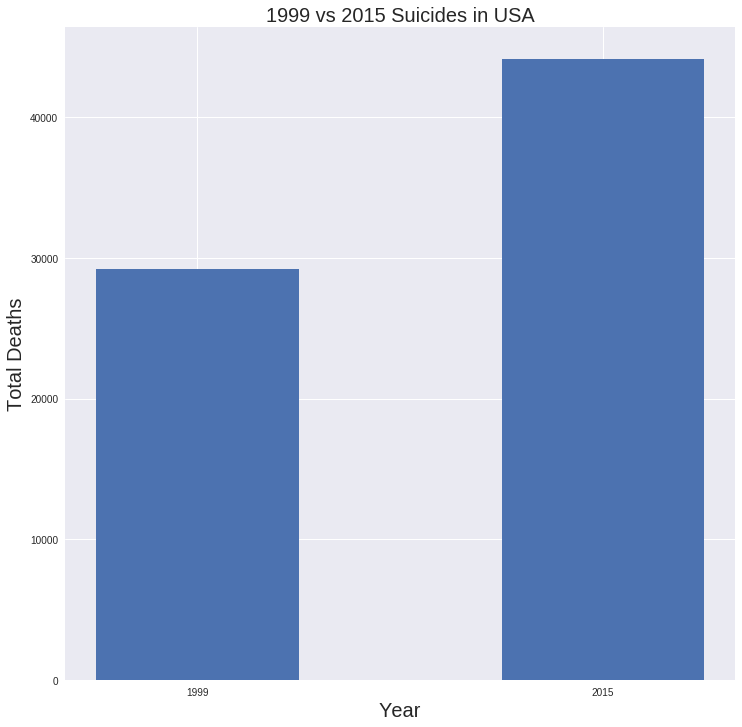

In [31]:
# plot bar chart to show differences in deaths between two years
bars1 = [us_sui['Suicides'][-1:].values, us_diab['Diabetes Deaths'][-1:].values, us_pne['Pnemonia/Influenza Deaths'][-1:].values, us_heart['Ischaemic Heart Deaths'][-1:].values]
plt.style.use('seaborn-darkgrid')
plt.rc('font', size=15) 
plt.figure(figsize = [12,12])
plt.bar(['2015','1999'], height = comp['Suicide'], width = 0.5)
plt.title('1999 vs 2015 Suicides in USA', fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Total Deaths',fontsize = 20)


In [32]:
# confirm CDCs 30% Increse since 1999
perc_inc = (us_sui['Suicide_Rate'].loc[us_sui['Year']==2015].values.tolist()[0] - us_sui['Suicide_Rate'].loc[us_sui['Year']==1999].values.tolist()[0])/us_sui['Suicide_Rate'].loc[us_sui['Year']==1999].values.tolist()[0]*100
print('Suicide rate increased by ', np.round(perc_inc,2),'%', 'since 1999.')

('Suicide rate increased by ', 28.56, '%', 'since 1999.')


# US Suicide and Sex Analysis

Next, we look at the rate of suicide in the US for each sex. Many studies have shown that "males have a disproportionately lower rate of suicide attempts and an excessively higher rate of suicides compared to females." In other words, males commit suicide far more than females. Interestingly, men have lower rates of attempted suicide, where females have very high rates. There are many PubMed articles that delve into the sex differences in suicide. For a cross national study in Europe see [here](https://www.ncbi.nlm.nih.gov/pubmed/26147965) and for the lethality of methods used between sexes see [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5492308/).

A very similar preprocessing was done for the following data. Recall, we created dataframe copies that held the 'Sex' column from the suicide dataset. Population and country data are merged, along with country data, and suicide data, and these two resultant dataframes are then merged. Population data needed to be updated for the corresponding sexes in the US from 2008-2015. The population per sex was found from [WorldBank](https://data.worldbank.org/indicator/SP.POP.TOTL.FE.IN). 

In [0]:
# use previous dataframes with 'Sex' column for population and deaths
pop_sex = pop_sex.merge(countries, left_on='Country', right_on='country')
sex_df[['Country', 'Year', 'Sex','Deaths1']] = sex_df[['Country','Year', 'Sex', 'Deaths1']].astype(int)
sex_df = sex_df.merge(countries, left_on='Country', right_on='country')

In [0]:
# drop columns
pop_sex.drop(columns=['Country','country'], inplace= True)
pop_sex.columns = ['Year', 'Sex','Population', 'Country']
sex_df.drop(columns=['Country','country','Cause','Admin1', 'SubDiv','List','Frmat','IM_Frmat'], inplace= True)
sex_df.columns = ['Year', 'Sex','Suicides', 'Country']

In [0]:
# Group by and sum
pop_sex = pop_sex.groupby(['Country','Year','Sex'], as_index = False).agg('sum')
sex_df = sex_df.groupby(['Country','Year','Sex'], as_index = False).agg('sum')

In [0]:
# Merge two population data with sex death data
sex_df = sex_df.merge(pop_sex, on=['Country','Year', 'Sex'], how = 'left')

In [0]:
# Grab US data
us_sex = sex_df[sex_df['Country'] == 'United States of America']

In [0]:
# create array of population data for update for years with missing pop data
males = [150141736,151490722,152796770,153982182,155184527,156327578,157545543,158747453]
fem = [153952230,155280807,156551423,157681176,158813852,159877330,161017913,162149165]
update_pop = []
for i in range(len(males)):
    update_pop.extend([males[i],fem[i]])



In [0]:
# update population data
for i in range(8454,8470):
    us_sex.loc[i,'Population'] = update_pop[i-8454]

In [0]:
# create suicide rate column
us_sex['Suicide_Rate'] = us_sex.loc[:,'Suicides']/us_sex.loc[:,'Population']

Text(0,0.5,u'Suicide Rate')

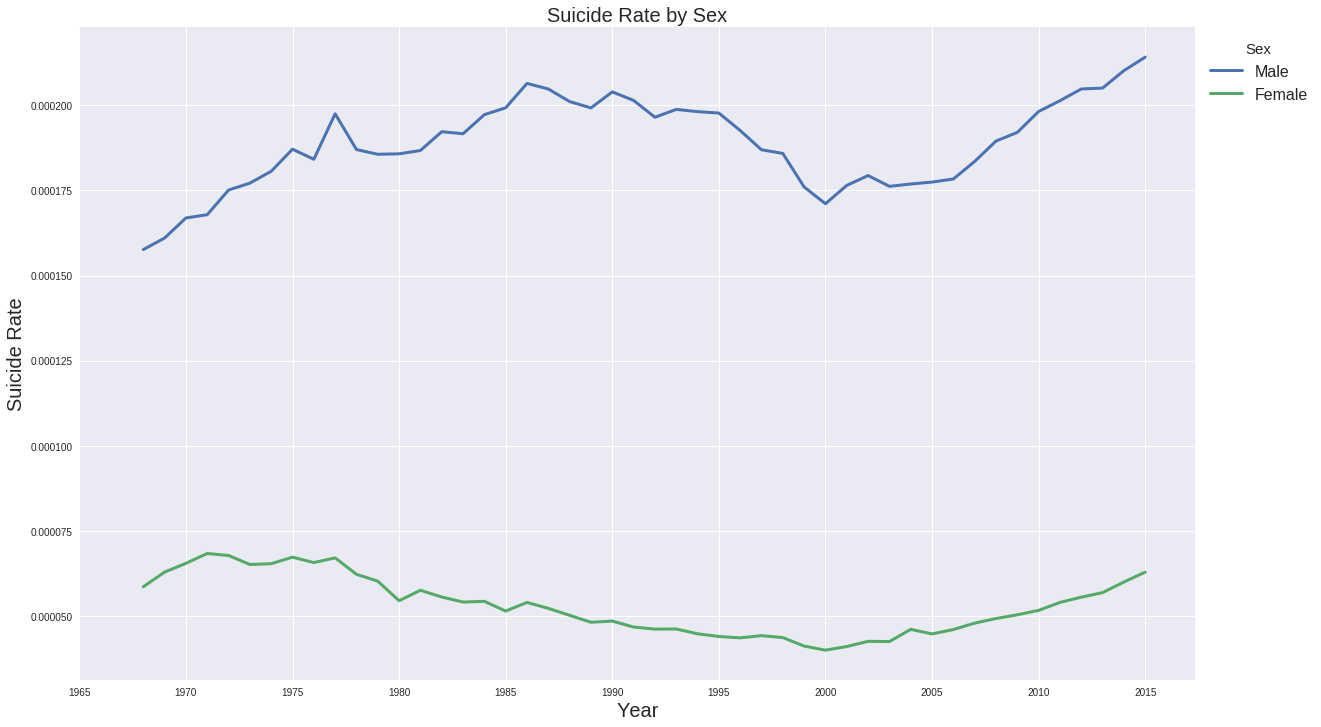

In [41]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = [20,12])
plt.rc('font', size=15) 
plt.plot(us_sex['Year'][us_sex['Sex']==1],us_sex['Suicide_Rate'][us_sex['Sex']==1], label = 'Male', linewidth= 3)
plt.plot(us_sex['Year'][us_sex['Sex']==2],us_sex['Suicide_Rate'][us_sex['Sex']==2], label = 'Female', linewidth=3)
plt.legend(ncol = 1, loc = 2, bbox_to_anchor=(1,1),prop={'size': 16},fontsize = 20, title='Sex')
plt.title('Suicide Rate by Sex', fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.xticks([1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])
plt.ylabel('Suicide Rate',fontsize = 20)

As seen in the graph above, the male suicide rate in the US is much higher compared to the suicide rates for females in the US. This was expected as males have a much higher rate of suicides, while females have a much higher rate of attempted suicides (though attempted suicides was not a feature in our data, so there was no way of confirming this in this analysis). The rates of increase for each age since 1999 are shown below. Females had a large increase in suicides since 1999.

In [42]:
male_perc = (us_sex['Suicide_Rate'].loc[us_sex['Year']==2015].tolist()[0] - us_sex['Suicide_Rate'].loc[us_sex['Year']==1999].tolist()[0])/us_sex['Suicide_Rate'].loc[us_sex['Year']==1999].tolist()[0]
fem_perc = (us_sex['Suicide_Rate'].loc[us_sex['Year']==2015].tolist()[1] - us_sex['Suicide_Rate'].loc[us_sex['Year']==1999].tolist()[1])/us_sex['Suicide_Rate'].loc[us_sex['Year']==1999].tolist()[1]
print('The male suicide rate increased by ', np.round(male_perc*100,2),'%',' since 1999')
print('The female suicide rate increased by ', np.round(fem_perc*100,2),'%',' since 1999')

('The male suicide rate increased by ', 21.66, '%', ' since 1999')
('The female suicide rate increased by ', 52.74, '%', ' since 1999')


# US Suicide Analysis by Age

Lastly, we delve into analyzing suicide by age. Recall the original dataframe had 39 columns. Many of the columns, particularly columns 'Deaths2' to 'Deaths 25' represent age groups. The values in those columns are suicides for that age group. See the data frame head below.

In [43]:
age_df.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2005,101,1101,1,07,08,4,...,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
1,1400,NaN,NaN,2005,101,1101,2,07,08,1,...,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
2,1400,NaN,NaN,2006,101,1101,1,07,08,8,...,2,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
3,1400,NaN,NaN,2006,101,1101,2,07,08,0,...,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN
4,1400,NaN,NaN,2007,101,1101,1,07,08,5,...,1,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN


The age groups Deaths2 - Deaths6 were combined into one age group since they were all under the ages of 5. Further, Deaths 23 - Deaths 25 were combined into one age group for 85 years and older. The other age groups, Deaths7 - Deaths22 simply increase by 5 years per group i.e. 5-9, 10-14, 15-19, etc. The population data is the same just with column names beginning with Pop.

In [0]:
# fix up dataframes, deaths 2-6 correspond to ages of 0-4, which are combined. Similarly, Deaths23,Deaths24,and Deaths25 are combined to reperesent 85+
age_df = age_df.drop(columns = ['Cause','Admin1','SubDiv','List','Frmat','IM_Frmat','Deaths1','Deaths26','IM_Deaths1','IM_Deaths2','IM_Deaths3','IM_Deaths4'])
age_df = age_df.astype(float)
age_df['Deaths2'] = age_df[['Deaths2','Deaths3','Deaths4','Deaths5','Deaths6']].sum(axis=1) # combine Under 5 years old
age_df['Deaths23'] = age_df[['Deaths23','Deaths24','Deaths25']].sum(axis=1) # combine 85+
# drop columns
age_df = age_df.drop(columns = ['Deaths3','Deaths4','Deaths5','Deaths6','Deaths24','Deaths25'])

In [0]:
# do the same for the population data
pop_age = pop_age.drop(columns = ['Admin1','SubDiv','Frmat','Pop1','Pop26','Lb'])
pop_age['Pop2'] = pop_age[['Pop2','Pop3','Pop4','Pop5','Pop6']].sum(axis=1) # combine under 5 years old
pop_age['Pop23'] = pop_age[['Pop23','Pop24','Pop25']].sum(axis=1) # combine 85+
pop_age = pop_age.drop(columns = ['Pop3','Pop4','Pop5','Pop6','Pop24','Pop25'])

In [0]:
# merge with country data
pop_age = pop_age.merge(countries, left_on='Country', right_on='country')
age_df[['Country', 'Year', 'Sex']] = age_df[['Country','Year', 'Sex']].astype(int)
age_df = age_df.merge(countries, left_on='Country', right_on='country')

In [0]:
# drop extra columns
age_df.drop(columns = ['Country','country'], inplace = True)
pop_age.drop(columns = ['Country','country'], inplace = True)

In [0]:
# groupby country (name), year, and sex
pop_age = pop_age.groupby(['name','Year','Sex'], as_index = False).agg('sum')
age_df = age_df.groupby(['name','Year','Sex'], as_index = False).agg('sum')

In [0]:
# merge to one dataframe
age_df = age_df.merge(pop_age, on=['name','Year', 'Sex'], how = 'left')

In [0]:
# change labels of columns
labels = ['Under 5','5 to 9','10 to 14','15 to 19','20 to 24','25 to 29','30 to 34', # labels for columns
          '35 to 39','40 to 44','45 to 49','50 to 54','55 to 59','60 to 64','65 to 69',
          '70 to 74','75 to 79','80 to 84','85 and older']
col_names = ['Country','Year','Sex'] + ['Deaths' + ' '+ i for i in labels] + ['Pop' + ' ' + i for i in labels] 
age_df.columns = col_names

In [0]:
# grab US data
us_age = age_df[age_df['Country'] == 'United States of America']

As we have seen in the sex data analysis and the original data analysis, population data is missing from the years 2008-2015. Unfortunately, there are not many resources that have age population data resources in the particular age group ranges the WHO uses other than the US Census. The US census uses the exact age distributions the WHO uses; however, the most recent census is from 2010. It has been shown that the age distributions over the past 20 years have remained seemingly unchanged, thus percentages from the 2010 US Census should be relatively good estimates of the population age distributions from 2008-2015 using the corresponding populations from those years. For a depiction of the age distributions from 1990 and 2000, see [here](http://www.censusscope.org/us/chart_age.html) and for the 2010 US census data age distribution percentages, see [here](https://www.census.gov/data/tables/2010/demo/age-and-sex/2010-age-sex-composition.html).

In [0]:
male_perc = [7.3,7.1,6.8,7.2,7.1,7.3,6.5,6.6,6.8,7.4,7.2,6.2,5.1,3.8,2.7,2.0,1.6,1.1] # percentages of pop males corresponding to age groups above, 2010 census
fem_perc = [6.8,6.6,6.3,6.7,6.8,6.8,6.4,6.5,6.7,7.4,7.2,6.4,5.5,4.1,3.1,2.7,2.2,2.0] # percentages of pop females
males = [150141736,151490722,152796770,153982182,155184527,156327578,157545543,158747453] # population of males 2008-2015
fem = [153952230,155280807,156551423,157681176,158813852,159877330,161017913,162149165] # population of females 2008-2015

def get_age_dist(percent, pop): # get missing data from 2008-2015 using age distribution percentages from 2010 census and total pop data
    pop_dist = []
    for i in range(len(pop)):
        temp = []
        for j in range(len(percent)):
            temp.append(percent[j]/100 * pop[i])
        pop_dist.append(temp)
    return np.round(pop_dist,0).tolist()

male_dist = get_age_dist(male_perc,males)
fem_dist = get_age_dist(fem_perc,fem)

dist_final = []

for i in range(len(male_dist)): # combine into final list
    dist_final.extend([male_dist[i],fem_dist[i]])



In [0]:
# update dataframe with new population data
for i in range(8454,8470):
    us_age.loc[i,'Pop Under 5':] = dist_final[i-8454]

In [54]:
us_age.head()

,Country,Year,Sex,Deaths Under 5,Deaths 5 to 9,Deaths 10 to 14,Deaths 15 to 19,Deaths 20 to 24,Deaths 25 to 29,Deaths 30 to 34,...,Pop 40 to 44,Pop 45 to 49,Pop 50 to 54,Pop 55 to 59,Pop 60 to 64,Pop 65 to 69,Pop 70 to 74,Pop 75 to 79,Pop 80 to 84,Pop 85 and older
8374,United States of America,1968,1,0.0,2.0,95.0,716.0,1073.0,1017.0,974.0,...,5940000.0,5806000.0,5239000.0,4654000.0,3837000.0,3018000.0,2207000.0,1599000.0,898000.0,469000.0
8375,United States of America,1968,2,0.0,0.0,21.0,200.0,368.0,431.0,433.0,...,6274000.0,6205000.0,5609000.0,5062000.0,4325000.0,3617000.0,2943000.0,2264000.0,1343000.0,769000.0
8376,United States of America,1969,1,0.0,4.0,91.0,796.0,1276.0,1181.0,1004.0,...,5873000.0,5880000.0,5292000.0,4735000.0,3895000.0,3089000.0,2200000.0,1599000.0,918000.0,490000.0
8377,United States of America,1969,2,0.0,1.0,40.0,249.0,410.0,483.0,487.0,...,6199000.0,6292000.0,5690000.0,5168000.0,4415000.0,3704000.0,2963000.0,2315000.0,1394000.0,799000.0
8378,United States of America,1970,1,0.0,2.0,100.0,851.0,1527.0,1312.0,1113.0,...,5801000.0,5918000.0,5347000.0,4794000.0,3947000.0,3140000.0,2210000.0,1588000.0,938000.0,520000.0


In [0]:
# create suicide rate columns
for i in range(18):
    us_age['S_Rate'+ labels[i]] = us_age.iloc[:,i+3]/us_age.iloc[:,i+21]
    

Text(0,0.5,u'Suicide Rate')

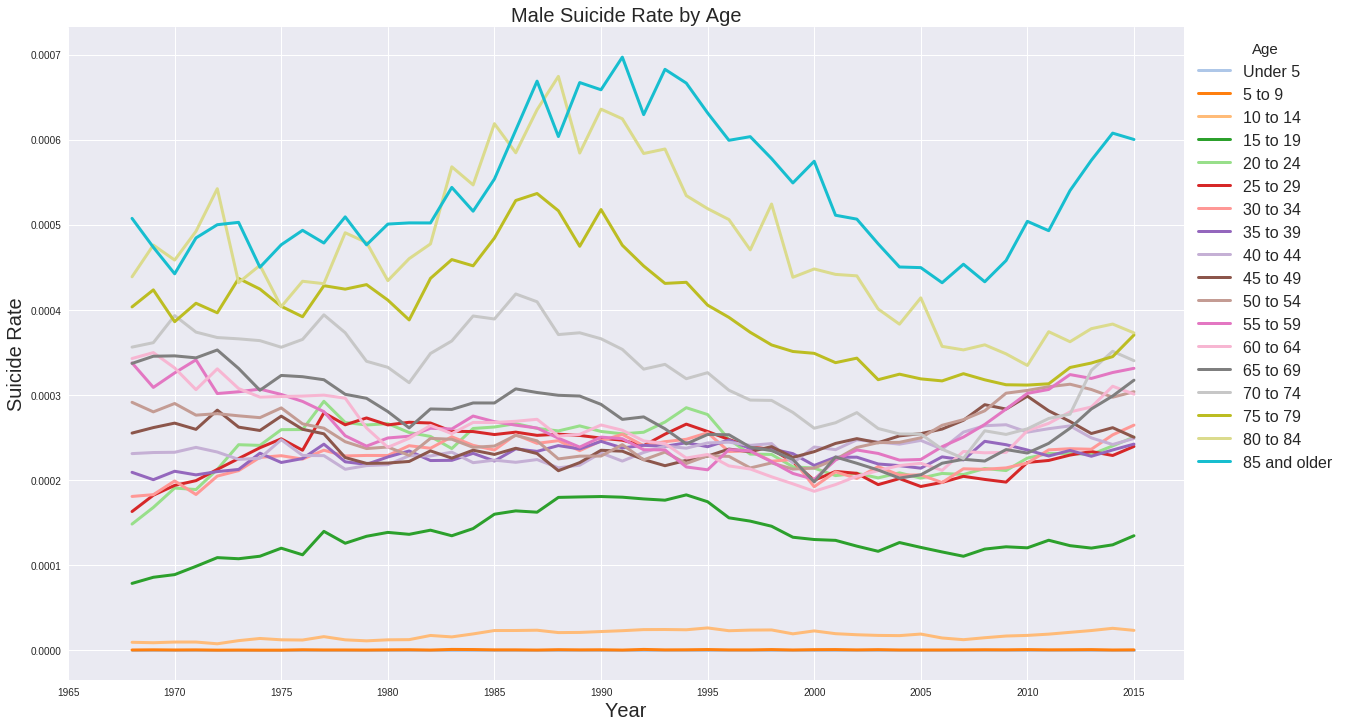

In [56]:
# plot male suicide rates based on age
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20')
plt.figure(figsize = [20,12])
plt.rc('font', size=15) 
num = 0
for i in labels:
    num+=1
    plt.plot(us_age.Year[us_age.Sex == 1], us_age.loc[us_age.Sex==1,'S_Rate'+ i], color = palette(num), label = i, linewidth = 3)
plt.legend(ncol = 1, loc = 2, bbox_to_anchor=(1,1),prop={'size': 16},title='Age')
plt.title('Male Suicide Rate by Age',fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.xticks([1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])
plt.ylabel('Suicide Rate',fontsize = 20)



As seen in the graph above, older males, 85 and older, commit suicide at the highest rate. However, it appears there is a overall increasing trend for all age groups since 1999. It is well known that age pertains a lot to whether one will commit suicide or not. In one study (link below), it found that older age was found to be more determined in suicide attempts and intervention was less effective in older people and more effective in younger people. Lastly, it was found that suicide attempts in younger people was 200 times greater than that of older people, which emphasizes that completed suicide in older individuals is far greater. 

https://www.ajgponline.org/article/S1064-7481(12)61020-3/fulltext

Text(0,0.5,u'Suicide Rate')

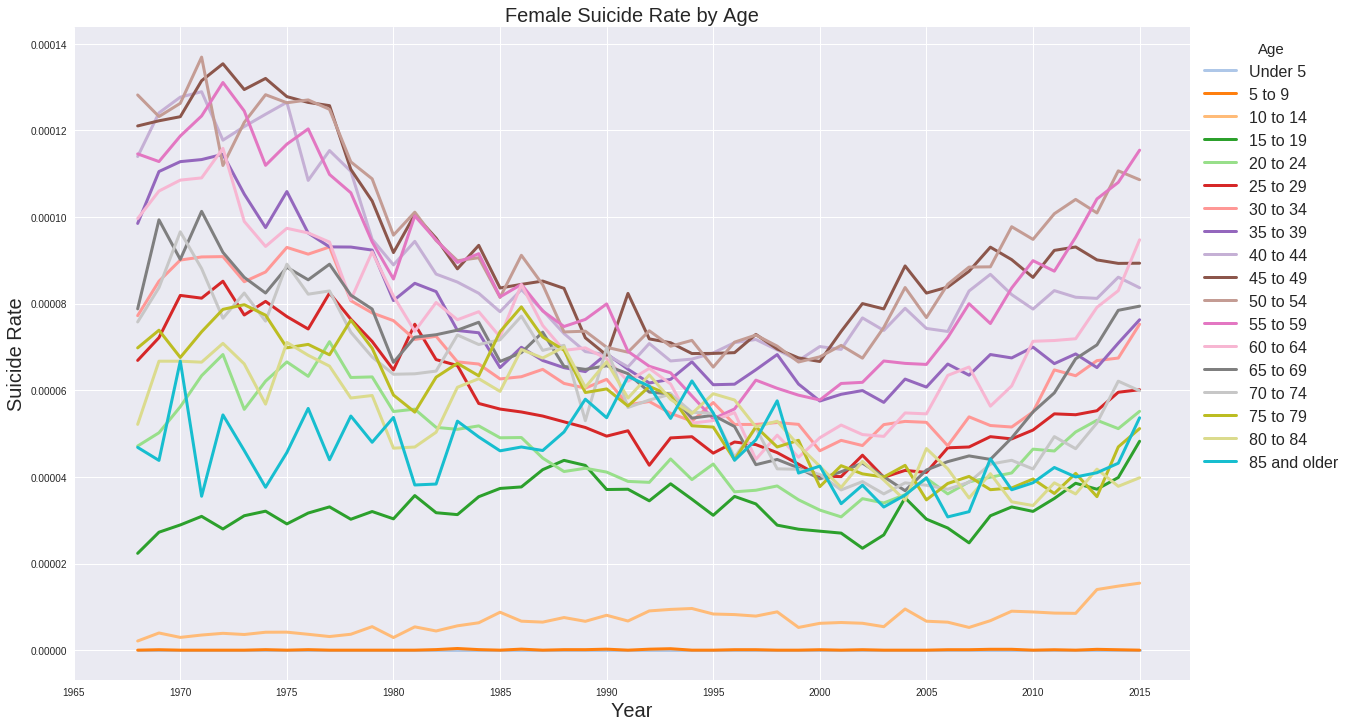

In [57]:
# plot female suicide rates based on age
palette = plt.get_cmap('tab20')
plt.figure(figsize = [20,12])
num = 0
for i in labels:
    num+=1
    plt.plot(us_age.Year[us_age.Sex == 2], us_age.loc[us_age.Sex==2,'S_Rate'+ i], color = palette(num), label = i, linewidth = 3)
plt.legend(ncol = 1, loc = 2, bbox_to_anchor=(1,1),prop={'size': 16}, title='Age')
plt.title('Female Suicide Rate by Age',fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.xticks([1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])
plt.ylabel('Suicide Rate',fontsize = 20)

As seen in the graph above, in most age groups, female suicide rates have increased since 1999. The CDC found that 

In [0]:
# combine to total population
us_age_tot = us_age.groupby('Year',as_index=False).agg('sum')
us_age_tot.drop(columns ='Sex', inplace = True)

Text(0,0.5,u'Suicide Rate')

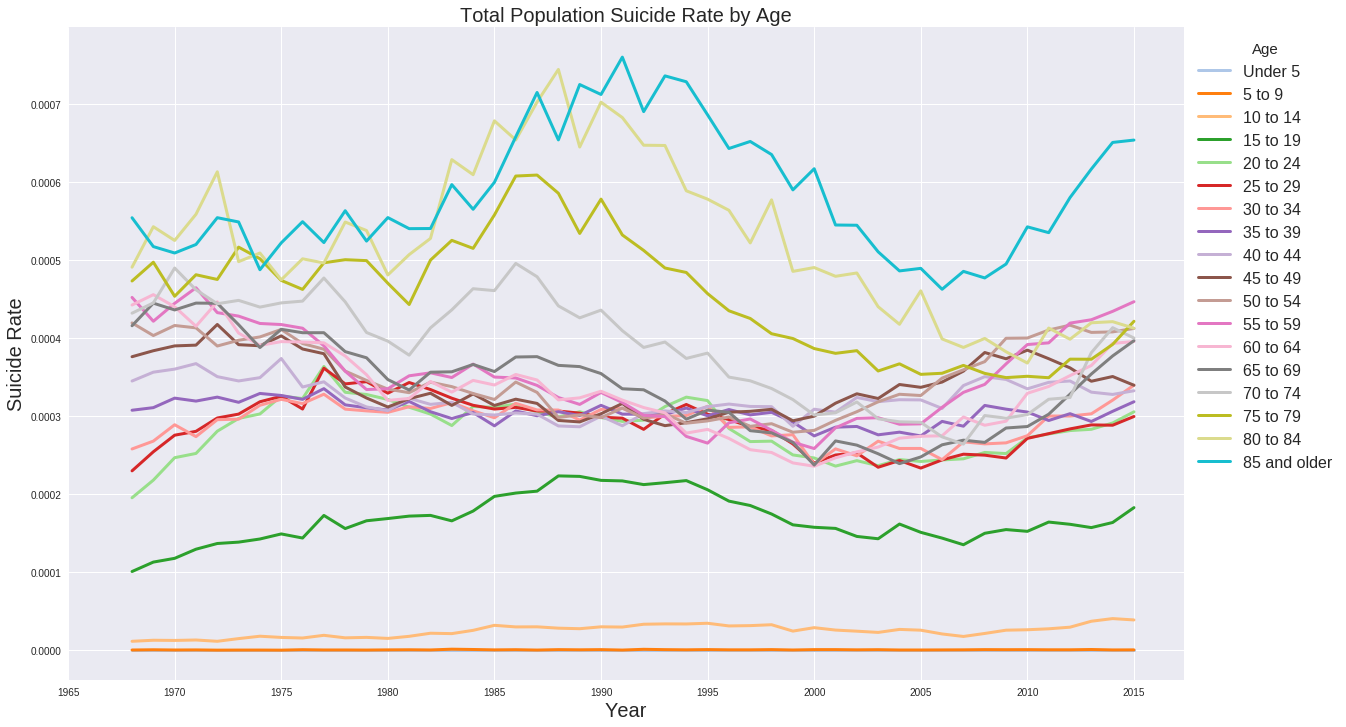

In [59]:
palette = plt.get_cmap('tab20')
plt.figure(figsize = [20,12])
num = 0
for i in labels:
    num+=1
    plt.plot(us_age_tot.Year, us_age_tot.loc[:,'S_Rate'+ i], color = palette(num), label = i, linewidth = 3)
plt.legend(ncol = 1, loc = 2, bbox_to_anchor=(1,1),prop={'size': 16}, title='Age')
plt.title('Total Population Suicide Rate by Age',fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.xticks([1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015])
plt.ylabel('Suicide Rate',fontsize = 20)

Lastly, find the percent changes for each age group since 1999. They are displayed in the dataframe below. Nearly all age groups increased. Interestingly, the age group 80 to 84 decreased. It would be intriguing to look into this further in another study. 

In [0]:
total_age_perc = []
for i in labels[1:]:
  total_age_perc.append((us_age_tot['S_Rate'+i].loc[us_age_tot['Year']==2015].tolist()[0] - us_age_tot['S_Rate'+i].loc[us_age_tot['Year']==1999].tolist()[0])/us_age_tot['S_Rate'+i].loc[us_age_tot['Year']==1999].tolist()[0]*100)


In [0]:
age_perc_df = pd.DataFrame([np.round(total_age_perc,2)], columns = labels[1:])

In [62]:
age_perc_df

,5 to 9,10 to 14,15 to 19,20 to 24,25 to 29,30 to 34,35 to 39,40 to 44,45 to 49,50 to 54,55 to 59,60 to 64,65 to 69,70 to 74,75 to 79,80 to 84,85 and older
0,81.14,58.55,13.75,22.1,13.3,23.02,8.91,15.88,15.49,47.64,67.57,64.85,49.02,24.57,5.54,-15.01,10.82


Overall, there is clearly a severe public health concern in the US due to these drastic changes in suicide, yet how can the US and other countries around the world better predict people at risk for suicide? What features are the most important?

The [CDC](https://www.nimh.nih.gov/health/statistics/suicide.shtml) and [WHO](http://www.who.int/mental_health/suicide-prevention/en/) have discussed many identifiers for suicide, including *known* mental health conditions, relationship problems, substance abuse, immediate crisis, physical health problems, and many others. These predictors vary significantly and can change on a day to day basis. On any given two days, the first day a person could be at 'no risk' and the next day be at 'high risk' due to the timely nature of these factors. This makes building a model to predict suicide extremely difficult because only those that are consistently displaying these signals could be predicted 'at risk' for suicide. However, people who are consistently displaying these factors are often diagnosed as depressed and at a higher risk for suicide, see [here](https://www.hhs.gov/answers/mental-health-and-substance-abuse/does-depression-increase-risk-of-suicide/index.html). Further, many of the factors associated with depression, as described by the [CDC](https://www.cdc.gov/tobacco/campaign/tips/diseases/depression-anxiety.html) and [WHO](http://www.who.int/news-room/fact-sheets/detail/depression), are similar to that of suicide. These factors include major life changes, physical health problems, substance abuse, and traumatic events. Because of the relationship between depression and suicide, we built our model on predicting depression. The important features from this model are identified, which we believe will offer further insight into the complexities of mental health and suicide.

# Investigating Factors Associated with Depression

We now turn to the CDC [NHANES](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015) dataset for the 2015-2016 year to examine how many aspects relate to depression. We hope to uncover underlying associations which can shed light to the [rising rates of depression](https://www.cambridge.org/core/journals/psychological-medicine/article/trends-in-depression-prevalence-in-the-usa-from-2005-to-2015-widening-disparities-in-vulnerable-groups/8A2904A85BB1F4436102DB78E3854E35).

In [63]:
# Change this location to the path where you would like your data saved to
data_dir = '/content/' # working directory in google colab

# Path to hdf store we will create later
hdf_path = 'nhanes.h5'

# for downloading the sas files and storing in the HDF
!pip install tables

# from the evidation health science module utils file
def read_sas_write_hdf(read_paths, write_dir, hdf_store):
    """
    Read raw SAS files from source and write to binary feather
    format.
    
    Inputs:
        read_paths (dict): Dictionary of name: url key-value
        pairs to download
        write_dir (str): Path to hdf store
        hdf_store (str): Name of hdf store to write to
        
    Returns:
        None. Write downloaded data to hdf store.
    """
    for data_name, path in read_paths.items():
        tmp = pd.read_sas(path)
        tmp.columns = [x.lower() for x in tmp.columns] # pythonize column names
        tmp['seqn'] = tmp['seqn'].astype('object')
        tmp.columns = [x.lower() for x in tmp.columns]
        tmp.to_hdf(os.path.join(write_dir, hdf_store), data_name)


    100% |████████████████████████████████| 3.8MB 5.9MB/s 
    100% |████████████████████████████████| 174kB 27.6MB/s 


We decided to consider many factors, including demographic information, general health information such as cigarette and alcohol usage, as well as many blood-chemical measurements. We also look at factors related to income and financial security.

In [64]:
source_paths = {
    'depression_screener': 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DPQ_I.XPT',
    'demographics': 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT',
    'body_measures': 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.XPT',
    'standard_biochemistry_profile': 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BIOPRO_I.XPT',
    'glycohemoglobin': 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/GHB_I.XPT',
    'disability' : 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DLQ_I.XPT',
    'sleep_disorders' : 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SLQ_I.XPT',
    'cigarette_use' : 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.XPT',
    'alcohol_use' : 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.XPT',
    'hospital_utilization' : 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HUQ_I.XPT',
    'housing' : 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HOQ_I.XPT',
    'income' : 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/INQ_I.XPT',
    'creatinine' : 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALB_CR_I.XPT',
    'HDL' : 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HDL_I.XPT',
    'total_cholesterol' : 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/TCHOL_I.XPT',
    'chromium_cobalt' : 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/CRCO_I.XPT'
}

read_sas_write_hdf(source_paths, data_dir, 'nhanes.h5')

#with pd.HDFStore(os.path.join(data_dir, 'nhanes.h5')) as hdf:
    #print(hdf.keys())

/usr/local/lib/python2.7/dist-packages/pandas/io/pytables.py:281: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->axis0] [items->None]

  f(store)
/usr/local/lib/python2.7/dist-packages/pandas/io/pytables.py:281: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->unicode,key->block0_items] [items->None]

  f(store)
/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:1471: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->[u'seqn', u'smdupca', u'smd100br']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
/usr/local/lib/python2.7/dist-packages/pandas/io/pytables.py:281: PerformanceWarning: 
your performance may suffer as PyTables will pickle object ty

## Data Preprocessing

The depression questionairre contains responses to the [PHQ-9](https://en.wikipedia.org/wiki/PHQ-9) question instrument used to make a depression diagnosis based on 9 simple questions according to [DSM-IV](https://en.wikipedia.org/wiki/Diagnostic_and_Statistical_Manual_of_Mental_Disorders) criteria. Each question is graded on a scale of 0 to 3 based on severity of symptoms. A total score of 10 or more points is suggestive of depression.

In [0]:
depression_screener = pd.read_hdf(os.path.join(data_dir, hdf_path), 'depression_screener').set_index('seqn')

# drop the non-used question in scoring
depression_screener = depression_screener.drop('dpq100', axis=1)

# replace those who refused to answer or didnt know with NA
depression_screener = depression_screener.replace([7, 9], np.nan)

# remove all NAs
depression_screener = depression_screener.dropna()

# change data type to int
depression_screener = depression_screener.astype('int64')

# sum all values from questions to obtain phq-9 score
depression_screener['phq9'] = depression_screener.sum(axis=1)

Many of the raw files contain repeated measurements in different units, or dozens of questions delving into depths we will not consider in this report. Further, many of these questions were only asked to a small subset of participants, based on their answers to other questions. There are also many aspects which we did not wish to consider, or felt would not be relevant to the rates of depression after considering other factors. We also get rid of observations where the respondent didnt know the answer or refused to answer the question or provide the measurement, as well as those that were not asked to answer the question or provide the measurement. 

In [0]:
demographics = pd.read_hdf(os.path.join(data_dir, hdf_path), 'demographics').set_index('seqn')

demographics = demographics[['riagendr', 'ridageyr', 'ridreth3', 'indhhin2', 'dmdeduc2', 'dmdmartl', 'dmdhhsiz',]]

# get rid of refused and dont know, as well as those that only answered under or over 20k
demographics = demographics[~demographics.indhhin2.isin([77, 99, 12, 13])]

# remove dont know and refused to answer from education level
demographics = demographics[~demographics.dmdeduc2.isin([7, 9])]

# remove dont know and refused to answer from marital status
demographics = demographics[~demographics.dmdmartl.isin([77, 99])]

# drop all rows with an NA value
demographics = demographics.dropna()

################################################################################

body_measures = pd.read_hdf(os.path.join(data_dir, hdf_path), 'body_measures').set_index('seqn')

# only select BMI
body_measures = body_measures[['bmxbmi']]

# drop NA values
body_measures = body_measures.dropna()

################################################################################

standard_biochemistry_profile = pd.read_hdf(os.path.join(data_dir, hdf_path), 'standard_biochemistry_profile').set_index('seqn')

# select measurements made in SI units
standard_biochemistry_profile = standard_biochemistry_profile[['lbdsalsi', 'lbxsapsi', 'lbxsassi', 'lbxsatsi', 
                                                               'lbdsbusi', 'lbxsc3si', 'lbdscasi', 'lbdschsi',
                                                               'lbxsck', 'lbxsclsi', 'lbdscrsi', 'lbdsgbsi', 
                                                               'lbdsglsi', 'lbxsgtsi', 'lbdsirsi', 'lbxsksi',
                                                               'lbxsldsi', 'lbxsnasi', 'lbdsphsi', 'lbdstbsi', 
                                                               'lbdstpsi', 'lbdstrsi', 'lbdsuasi']]

# only keep complete measurements
standard_biochemistry_profile = standard_biochemistry_profile.dropna()

################################################################################

glycohemoglobin = pd.read_hdf(os.path.join(data_dir, hdf_path), 'glycohemoglobin').set_index('seqn')

glycohemoglobin = glycohemoglobin.dropna()

################################################################################

sleep_disorders = pd.read_hdf(os.path.join(data_dir, hdf_path), 'sleep_disorders').set_index('seqn')

sleep_disorders = sleep_disorders[['sld012', 'slq120']]#, 'slq030', 'slq040']]

# drop refused or dont know
sleep_disorders = sleep_disorders[~sleep_disorders.slq120.isin([7, 9])]
#sleep_disorders = sleep_disorders[~sleep_disorders.slq030.isin([7, 9])]
#sleep_disorders = sleep_disorders[~sleep_disorders.slq040.isin([7, 9])]

# only keep complete observations
sleep_disorders = sleep_disorders.dropna()

################################################################################

cigarette_use = pd.read_hdf(os.path.join(data_dir, hdf_path), 'cigarette_use').set_index('seqn')

cigarette_use = cigarette_use['smd650']

# get rid of dont know and refused to answer
cigarette_use = cigarette_use[~cigarette_use.isin([777, 999])]

# question not asked to non-smokers, say they dont smoke at all
cigarette_use = cigarette_use.fillna(0)

################################################################################

alcohol_use = pd.read_hdf(os.path.join(data_dir, hdf_path), 'alcohol_use').set_index('seqn')

alcohol_use = alcohol_use['alq130']

# get rid of those who refused to answer or didnt know
alcohol_use = alcohol_use[~alcohol_use.isin([777, 999])]

# not asked to non-drinkers, replace with 0 drinks per day
alcohol_use = alcohol_use.fillna(0)

################################################################################

housing = pd.read_hdf(os.path.join(data_dir, hdf_path), 'housing').set_index('seqn')

housing = housing.hoq065

# drop dont know and refused to answer
housing = housing[~housing.isin([7, 9])]

# only keep complete measurements
housing = housing.dropna()

################################################################################

income = pd.read_hdf(os.path.join(data_dir, hdf_path), 'income').set_index('seqn')

income = income[['inq300', 'inq020', 'inq012', 'inq030', 'inq060', 'inq080', 'inq090', 
               'inq132', 'inq140']]

# drop dont know and refused to answer
income = income.replace([7, 9], np.nan)

# only keep complete measurements
income = income.dropna()

################################################################################

creatinine = pd.read_hdf(os.path.join(data_dir, hdf_path), 'creatinine').set_index('seqn')

creatinine = creatinine[['urxums', 'urxcrs', 'urdact']]

creatinine = creatinine.dropna()

################################################################################

hdl = pd.read_hdf(os.path.join(data_dir, hdf_path), 'HDL').set_index('seqn')

hdl = hdl['lbdhddsi']

hdl = hdl.dropna()

################################################################################

total_cholesterol = pd.read_hdf(os.path.join(data_dir, hdf_path), 'total_cholesterol').set_index('seqn')

total_cholesterol = total_cholesterol['lbdtcsi']

total_cholesterol = total_cholesterol.dropna()

################################################################################

chromium_cobalt = pd.read_hdf(os.path.join(data_dir, hdf_path), 'chromium_cobalt').set_index('seqn')

chromium_cobalt = chromium_cobalt[['lbdbcrsi', 'lbdbcosi']]

chromium_cobalt = chromium_cobalt.dropna()

################################################################################

hospital_utilization = pd.read_hdf(os.path.join(data_dir, hdf_path), 'hospital_utilization').set_index('seqn')

hospital_utilization = hospital_utilization['huq090']

# get rid of those who refused to answer or didnt know
hospital_utilization = hospital_utilization[~hospital_utilization.isin([7, 9])]

hospital_utilization = hospital_utilization.dropna()

################################################################################

disability = pd.read_hdf(os.path.join(data_dir, hdf_path), 'disability').set_index('seqn')

# questions about anxiety and depression, and mediations for them
disability = disability[['dlq100', 'dlq110', 'dlq140', 'dlq150']]

# get rid of those who refused to answer or didnt know
disability = disability.replace([7, 9], np.nan)

# only keep complete measurements
disability = disability.dropna()

################################################################################
################################################################################

# merge based on respondent id, only keeeping complete cases
data = depression_screener.merge(
    demographics, left_index = True, right_index = True).merge(
    body_measures, left_index = True, right_index = True).merge(
    sleep_disorders, left_index = True, right_index = True).merge(
    housing.to_frame(), left_index = True, right_index = True).merge(
    income, left_index = True, right_index = True).merge(
    cigarette_use.to_frame(), left_index = True, right_index = True).merge(
    alcohol_use.to_frame(), left_index = True, right_index = True).merge(
    standard_biochemistry_profile, left_index = True, right_index = True).merge(
    glycohemoglobin, left_index = True, right_index = True).merge(
    creatinine, left_index = True, right_index = True).merge(
    hdl.to_frame(), left_index = True, right_index = True).merge(
    total_cholesterol.to_frame(), left_index = True, right_index = True)

Many of the questions were categorical in nature, with numeric responses for the categories. We retype the data and rename the categories for ease of interpretation late on.

In [0]:
# retype these columns to int to get rid of near 0 values (variables are categorical)
data['slq120'] = data['slq120'].astype('int64')

# create the response variable from the phq9 score (see wikipedia)
data['depressed'] = (data.phq9 >= 10).astype('int64')

# get rid of depression quetsions, no longer needed
data = data.drop(['dpq010', 'dpq020', 'dpq030', 'dpq040', 'dpq050', 'dpq060', 'dpq070', 'dpq080', 'dpq090'], axis = 1)

# retype categorical vars as categorical
categorical_vars = ['riagendr', 'ridreth3', 'indhhin2', 'dmdeduc2', 'dmdmartl', 
                    'slq120', 'hoq065', 'inq300', 'inq020', 'inq012', 'inq030', 
                    'inq060', 'inq080', 'inq090', 'inq132', 'inq140', 'depressed']
for col in categorical_vars:
    data[col] = data[col].astype('category')
    
# rename categories
data.riagendr = data.riagendr.values.rename_categories(['Male', 'Female'])
data.ridreth3 = data.ridreth3.values.rename_categories(['MexAmer', 'OtherHisp', 'White', 'Black', 'Asian', 'Other'])
data.indhhin2 = data.indhhin2.values.rename_categories(['0-5k', '5-10k', '10-15k', '15-20k', '20-25k', '25k-30k',
                                                       '35-45k', '45-55k', '55-65k', '65-75k', '75-100k', '100k+'])
data.dmdeduc2 = data.dmdeduc2.values.rename_categories(['9thGrade', '9to11thGrade', 'HighSchoolGrad',
                                                       'SomeCollege', 'CollegeGrad'])
data.dmdmartl = data.dmdmartl.values.rename_categories(['Married', 'Widowed', 'Divorced', 'Separated',
                                                       'NeverMarried', 'LivingWPartner'])
data.slq120 = data.slq120.values.rename_categories(['Never', 'Rarely', 'Sometimes', 'Often', 'AlmAlways'])
data.hoq065 = data.hoq065.values.rename_categories(['Owned', 'Rented', 'Other'])
data.inq300 = data.inq300.values.rename_categories(['Yes', 'No'])
data.inq012 = data.inq012.values.rename_categories(['Yes', 'No'])
data.inq020 = data.inq020.values.rename_categories(['Yes', 'No'])
data.inq030 = data.inq030.values.rename_categories(['Yes', 'No'])
data.inq060 = data.inq060.values.rename_categories(['Yes', 'No'])
data.inq080 = data.inq080.values.rename_categories(['Yes', 'No'])
data.inq090 = data.inq090.values.rename_categories(['Yes', 'No'])
data.inq132 = data.inq132.values.rename_categories(['Yes', 'No'])
data.inq140 = data.inq140.values.rename_categories(['Yes', 'No'])
data.depressed = data.depressed.values.rename_categories(['No', 'Yes'])

## Modeling

We note that the clases are highly imbalanced, with only 8% of observations being classified as depressed. This can cause many problems in training a predictive model, as the imbalance causes an inherent bias towards predicting the most prevalent class. This is because many machine-learning algorithms focus on maixmizing accuracy, but with our imbalanced classes, we could classify everyone as not depressed and still maintain an overall accuracy of 92%!

To deal with this issue, we upsample the depressed population to even out the imbalance. Doing so increases the risk of overfitting however.

In [68]:
from sklearn.utils import resample

depressed = data[data.depressed == 'Yes']
not_depressed = data[data.depressed == 'No']

depressed_upsampled = resample(depressed,
                              replace = True,
                              n_samples = len(not_depressed),
                              random_state = 10)

data_upsampled = pd.concat([not_depressed, depressed_upsampled])

data_upsampled.depressed.value_counts()

Yes    3613
No     3613
Name: depressed, dtype: int64

We then generate a design matrix and response vector from the upsampled data and set aside 20% of the data to use to test our model later on.

In [0]:
# create design matrix and response variable for predictive models

# full model
full_formula = 'C(depressed) ~ C(riagendr) + ridageyr + C(ridreth3) + C(indhhin2) + C(dmdeduc2) + C(dmdmartl) + dmdhhsiz + bmxbmi + sld012 + C(slq120) + C(hoq065) + C(inq300) + C(inq012) + C(inq020) + C(inq030) + C(inq060) + C(inq080) + C(inq090) + C(inq132) + C(inq140) + smd650 + alq130 + lbdsalsi + lbxsapsi + lbxsassi + lbxsatsi + lbdsbusi + lbxsc3si + lbdscasi + lbdschsi + lbxsck + lbxsclsi + lbdscrsi + lbdsgbsi + lbdsglsi + lbxsgtsi + lbdsirsi + lbxsksi + lbxsldsi + lbxsnasi + lbdsphsi + lbdstbsi + lbdstpsi + lbdstrsi + lbdsuasi + lbxgh + urxums + urxcrs + urdact + lbdhddsi + lbdtcsi'

from patsy import dmatrices # For constructing design matrices from R-types of formulae
# create dataframes with an intercept column and dummy variables 
y, X = dmatrices(full_formula, data = data_upsampled, 
                 return_type="dataframe")

y = y.drop('C(depressed)[No]', axis=1).values[:, 0]

# create a test/train split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, # Predictors
                                                    y, # response
                                                    test_size=0.2, # % of test data 
                                                    random_state=0) # seed for random sampling

We fit several models using all the predictors to get an idea of performance.

[[542 178]
 [246 480]]
             precision    recall  f1-score   support

        0.0       0.69      0.75      0.72       720
        1.0       0.73      0.66      0.69       726

avg / total       0.71      0.71      0.71      1446



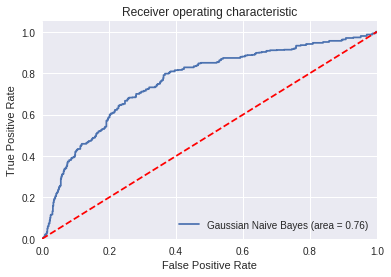

In [70]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes model using full model
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred_prob = gnb.predict_proba(X_test)[:,1]

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# confusion matrix for GNB model
print(confusion_matrix(y_test, y_pred))

# classification report for GNB model
print(classification_report(y_test, y_pred))

# ROC curve for GNB model
gnb_roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

[[554 166]
 [523 203]]
             precision    recall  f1-score   support

        0.0       0.51      0.77      0.62       720
        1.0       0.55      0.28      0.37       726

avg / total       0.53      0.52      0.49      1446



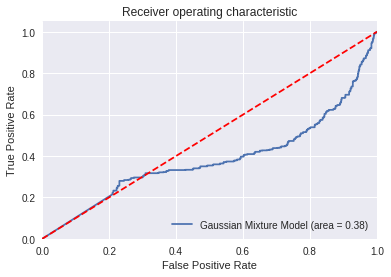

In [71]:
from sklearn.mixture import GaussianMixture

# Gaussian mixture model using full model
gmm = GaussianMixture(n_components=2).fit(X_train)
y_pred = gmm.predict(X_test)
y_pred_prob = gmm.predict_proba(X_test)[:,1]

# confusion matrix for GM model
print(confusion_matrix(y_test, y_pred))

# classification report for GM model
print(classification_report(y_test, y_pred))

# ROC curve for GM model
gmm_roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Mixture Model (area = %0.2f)' % gmm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

[[531 189]
 [198 528]]
             precision    recall  f1-score   support

        0.0       0.73      0.74      0.73       720
        1.0       0.74      0.73      0.73       726

avg / total       0.73      0.73      0.73      1446



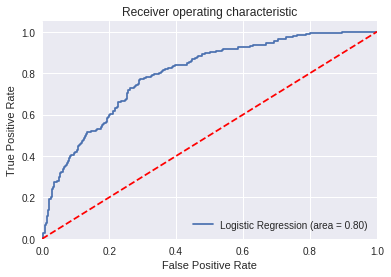

In [72]:
from sklearn.linear_model import LogisticRegression

# logistic regression using all predictors
logreg = LogisticRegression(fit_intercept = False).fit(X_train, y_train) # intercept included in design matrix
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# confusion matrix for logistic model
print(confusion_matrix(y_test, y_pred))

# classification report for logistic model
print(classification_report(y_test, y_pred))

# ROC curve for logistic model
logit_roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

0.7423875432525952
[[566 154]
 [175 551]]
             precision    recall  f1-score   support

        0.0       0.76      0.79      0.77       720
        1.0       0.78      0.76      0.77       726

avg / total       0.77      0.77      0.77      1446



/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


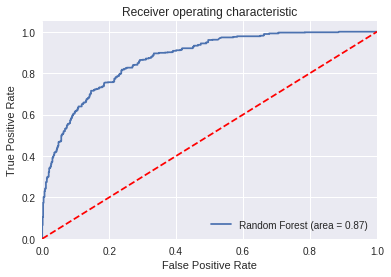

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Random forest using stepwise model
rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features='sqrt', random_state=1, oob_score = True).fit(X_train, y_train);
y_pred = rfc.predict(X_test)
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# print the out-of-bag score for the model
print(rfc.oob_score_)

# confusion matrix for RFC model
print(confusion_matrix(y_test, y_pred))

# classification report for RFC model
print(classification_report(y_test, y_pred))

# ROC curve for RFC model
rfc_roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

We see that the logistic regresion model and the random forest perform quite well. However, we believe that many of the blood chemical measurements are unecessary after considering the socio-economic variables such as demographic information and income security. 

We choose to focus on the logistic regression model so that we can retain some interpretability, as the goal of our study is to investigate relations more than to classify. We remove these features and fit a couple of models.

In [0]:
# create design matrix and response variable for predictive models

# model without blood data
non_bio_formula = 'C(depressed) ~ C(riagendr) + ridageyr + C(ridreth3) + C(indhhin2) + C(dmdeduc2) + C(dmdmartl) + dmdhhsiz + bmxbmi + sld012 + C(slq120) + C(hoq065) + C(inq300) + C(inq012) + C(inq020) + C(inq030) + C(inq060) + C(inq080) + C(inq090) + C(inq132) + C(inq140) + smd650 + alq130'

from patsy import dmatrices # For constructing design matrices from R-types of formulae
# create dataframes with an intercept column and dummy variables 
y_non_bio, X_non_bio = dmatrices(non_bio_formula, data = data_upsampled, 
                 return_type="dataframe")

y_non_bio = y_non_bio.drop('C(depressed)[No]', axis=1).values[:, 0]

# create a test/train split
from sklearn.model_selection import train_test_split 
X_train_non_bio, X_test_non_bio, y_train_non_bio, y_test_non_bio = train_test_split(X_non_bio, # Predictors
                                                    y_non_bio, # response
                                                    test_size=0.2, # % of test data 
                                                    random_state=100) # seed for random sampling

[[524 208]
 [217 497]]
             precision    recall  f1-score   support

        0.0       0.71      0.72      0.71       732
        1.0       0.70      0.70      0.70       714

avg / total       0.71      0.71      0.71      1446



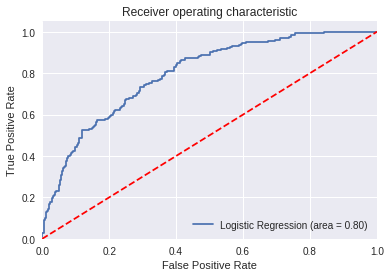

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# logistic regression using all predictors
logreg = LogisticRegression(fit_intercept = False).fit(X_train_non_bio, y_train_non_bio) # intercept included in design matrix
y_pred = logreg.predict(X_test_non_bio)
y_pred_prob = logreg.predict_proba(X_test_non_bio)[:, 1]

# confusion matrix for logistic model
print(confusion_matrix(y_test_non_bio, y_pred))

# classification report for logistic model
print(classification_report(y_test_non_bio, y_pred))

# ROC curve for logistic model
logit_roc_auc = roc_auc_score(y_test_non_bio, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test_non_bio, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

0.7475778546712802
[[581 151]
 [216 498]]
             precision    recall  f1-score   support

        0.0       0.73      0.79      0.76       732
        1.0       0.77      0.70      0.73       714

avg / total       0.75      0.75      0.75      1446



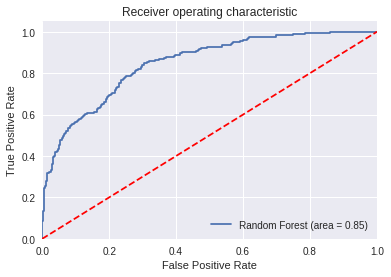

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Random forest using stepwise model
rfc = RandomForestClassifier(max_depth=5, n_estimators=100, max_features='sqrt', random_state=1, oob_score=True).fit(X_train_non_bio, y_train_non_bio)
y_pred = rfc.predict(X_test_non_bio)
y_pred_prob = rfc.predict_proba(X_test_non_bio)[:,1]

print(rfc.oob_score_)

# confusion matrix for RFC model
print(confusion_matrix(y_test_non_bio, y_pred))

# classification report for RFC model
print(classification_report(y_test_non_bio, y_pred))

# ROC curve for RFC model
rfc_roc_auc = roc_auc_score(y_test_non_bio, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test_non_bio, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Indeed, we see little decrease in model perfomance on our test set by removing these variables. Fittting a model using only these variables leads to quite poor relative performance.

In [0]:
# create design matrix and response variable for predictive models

# just using biological responses
bio_formula = 'C(depressed) ~ lbdsalsi + lbxsapsi + lbxsassi + lbxsatsi + lbdsbusi + lbxsc3si + lbdscasi + lbdschsi + lbxsck + lbxsclsi + lbdscrsi + lbdsgbsi + lbdsglsi + lbxsgtsi + lbdsirsi + lbxsksi + lbxsldsi + lbxsnasi + lbdsphsi + lbdstbsi + lbdstpsi + lbdstrsi + lbdsuasi + lbxgh + urxums + urxcrs + urdact + lbdhddsi + lbdtcsi'

from patsy import dmatrices # For constructing design matrices from R-types of formulae
# create dataframes with an intercept column and dummy variables 
y_bio, X_bio = dmatrices(bio_formula, data = data_upsampled, 
                 return_type="dataframe")

y_bio = y_bio.drop('C(depressed)[No]', axis=1).values[:, 0]

# create a test/train split
from sklearn.model_selection import train_test_split 
X_train_bio, X_test_bio, y_train_bio, y_test_bio = train_test_split(X_bio, # Predictors
                                                    y_bio, # response
                                                    test_size=0.2, # % of test data 
                                                    random_state=100) # seed for random sampling

[[437 295]
 [274 440]]
             precision    recall  f1-score   support

        0.0       0.61      0.60      0.61       732
        1.0       0.60      0.62      0.61       714

avg / total       0.61      0.61      0.61      1446



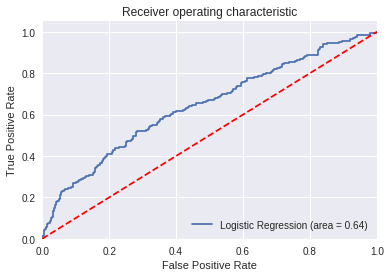

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# logistic regression using all predictors
logreg = LogisticRegression(fit_intercept = False).fit(X_train_bio, y_train_bio) # intercept included in design matrix
y_pred = logreg.predict(X_test_bio)
y_pred_prob = logreg.predict_proba(X_test_bio)[:, 1]

# confusion matrix for logistic model
print(confusion_matrix(y_test_bio, y_pred))

# classification report for logistic model
print(classification_report(y_test_bio, y_pred))

# ROC curve for logistic model
logit_roc_auc = roc_auc_score(y_test_bio, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test_bio, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

We seeks to further reduce the model by forcing the coefficients towards 0 using an $l_1$ penalty term on our reduced logistic model.

In [79]:
l1_logreg = LogisticRegression(penalty = 'l1', fit_intercept = False, C = .025).fit(X_train_non_bio, y_train_non_bio)

pd.DataFrame(zip(X_train_non_bio.columns, l1_logreg.coef_[0]), columns = ['parameter', 'coef'])

,parameter,coef
0,Intercept,0.000000
1,C(riagendr)[T.Female],0.316780
2,C(ridreth3)[T.OtherHisp],0.089324
3,C(ridreth3)[T.White],0.000000
4,C(ridreth3)[T.Black],0.000000
5,C(ridreth3)[T.Asian],0.000000
6,C(ridreth3)[T.Other],0.000000
7,C(indhhin2)[T.5-10k],0.000000
8,C(indhhin2)[T.10-15k],0.000000
9,C(indhhin2)[T.15-20k],0.000000


We see that 5 more variables are removed from this method: inq012, inq020, inq080, inq132, inq140 - various [questions](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/INQ_I.htm) about income sources.

In [0]:
# create design matrix and response variable for predictive models

# reduced model
lasso_formula = 'C(depressed) ~ C(riagendr) + ridageyr + C(ridreth3) + C(indhhin2) + C(dmdeduc2) + C(dmdmartl) + dmdhhsiz + bmxbmi + sld012 + C(slq120) + C(hoq065) + C(inq300) + C(inq030) + C(inq060) + C(inq090) + smd650 + alq130'

from patsy import dmatrices # For constructing design matrices from R-types of formulae
# create dataframes with an intercept column and dummy variables 
y_lasso, X_lasso = dmatrices(lasso_formula, data = data_upsampled, 
                 return_type="dataframe")

y_lasso = y_lasso.drop('C(depressed)[No]', axis=1).values[:, 0]

# create a test/train split
from sklearn.model_selection import train_test_split 
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, # Predictors
                                                    y_lasso, # response
                                                    test_size=0.2, # % of test data 
                                                    random_state=100) # seed for random sampling

[[528 204]
 [212 502]]
             precision    recall  f1-score   support

        0.0       0.71      0.72      0.72       732
        1.0       0.71      0.70      0.71       714

avg / total       0.71      0.71      0.71      1446



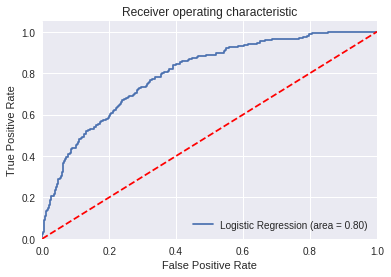

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# logistic regression using all predictors
logreg = LogisticRegression(fit_intercept = False).fit(X_train_lasso, y_train_lasso) # intercept included in design matrix
y_pred = logreg.predict(X_test_lasso)
y_pred_prob = logreg.predict_proba(X_test_lasso)[:, 1]

# confusion matrix for logistic model
print(confusion_matrix(y_test_lasso, y_pred))

# classification report for logistic model
print(classification_report(y_test_lasso, y_pred))

# ROC curve for logistic model
logit_roc_auc = roc_auc_score(y_test_lasso, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test_lasso, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

0.7550173010380623
[[578 154]
 [195 519]]
             precision    recall  f1-score   support

        0.0       0.75      0.79      0.77       732
        1.0       0.77      0.73      0.75       714

avg / total       0.76      0.76      0.76      1446



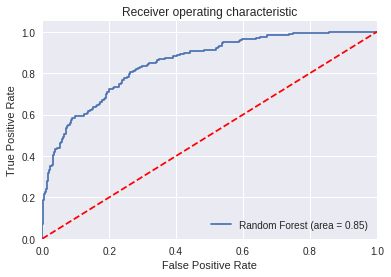

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Random forest using stepwise model
rfc = RandomForestClassifier(max_depth=5, n_estimators=500, max_features='sqrt', random_state=1, oob_score=True).fit(X_train_lasso, y_train_lasso)
y_pred = rfc.predict(X_test_lasso)
y_pred_prob = rfc.predict_proba(X_test_lasso)[:,1]

print(rfc.oob_score_)

# confusion matrix for RFC model
print(confusion_matrix(y_test_lasso, y_pred))

# classification report for RFC model
print(classification_report(y_test_lasso, y_pred))

# ROC curve for RFC model
rfc_roc_auc = roc_auc_score(y_test_lasso, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test_lasso, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

We see that neither of the models suffer from removal of these 5 variables. We are satisfied that this drastically reduced model encapsulates a sufficient amount of the information contained within all of the predictor variables we started with, and is much easier to interpret.